In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [4]:
data = pd.read_csv('diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu

In [6]:
# MODEL - JEDNA ZMIENNA - BMI

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test) # daje nam R^2

0.1905734684756012

In [8]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 4150.68


In [9]:
predykcje = model.predict(X_test)

InvalidIndexError: (slice(None, None, None), None)

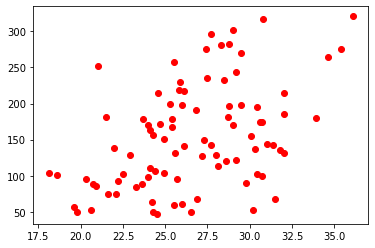

In [10]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

In [12]:
# MODEL2 - WSZYSTKIE ZMIENNE
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

model2 = LinearRegression()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.33223321731061817

In [13]:
print("Mean squared error: %.2f"
      % np.mean((model2.predict(X_test) - y_test) ** 2))

Mean squared error: 3424.26


Text(0.5, 0, 'Importance')

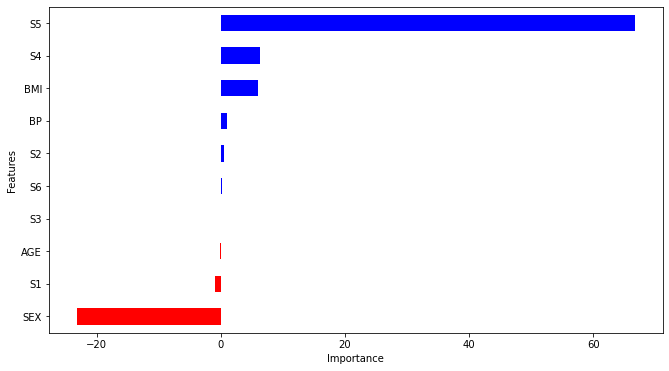

In [14]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model2.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Zadania

1. Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

In [ ]:
# ściąga: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [33]:
measures_df = pd.DataFrame(columns=['model', 'r^2','MSE'])

In [54]:
# new_rows = [{'model':'ALL', 'r^2':0.33223321731061817, 'MSE':'3424.26'},
#             {'model':'BMI', 'r^2':0.1905734684756012, 'MSE':'4150.68'}]
# measures_df = measures_df.append(new_rows, ignore_index=True) # will be deprecated - dont's use

new_row_1 = pd.DataFrame({'model':'ALL', 'r^2':0.3322, 'MSE':'3424.26'}, index=[0])
new_row_2 = pd.DataFrame({'model':'BMI', 'r^2':0.1906, 'MSE':'4150.68'}, index=[0])
measures_df = pd.concat([measures_df.loc[:], new_row_1, new_row_2]).reset_index(drop=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data[['AGE']], data.Y, test_size=0.2, random_state=0)

model3 = LinearRegression()
model3.fit(X_train, y_train)

measures_new = pd.DataFrame({'model':'AGE', 'r^2': model3.score(X_test, y_test), 'MSE':np.mean((model3.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data[['SEX']], data.Y, test_size=0.2, random_state=0)

model4 = LinearRegression()
model4.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'SEX', 'r^2': model4.score(X_test, y_test), 'MSE':np.mean((model4.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.2, random_state=0)

model5 = LinearRegression()
model5.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'BP', 'r^2': model5.score(X_test, y_test), 'MSE':np.mean((model5.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data[['S1']], data.Y, test_size=0.2, random_state=0)

model6 = LinearRegression()
model6.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'S1', 'r^2': model6.score(X_test, y_test), 'MSE':np.mean((model6.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data[['S2']], data.Y, test_size=0.2, random_state=0)

model7 = LinearRegression()
model7.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'S2', 'r^2': model7.score(X_test, y_test), 'MSE':np.mean((model7.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data[['S3']], data.Y, test_size=0.2, random_state=0)

model8 = LinearRegression()
model8.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'S3', 'r^2': model8.score(X_test, y_test), 'MSE':np.mean((model8.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data[['S4']], data.Y, test_size=0.2, random_state=0)

model9 = LinearRegression()
model9.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'S4', 'r^2': model9.score(X_test, y_test), 'MSE':np.mean((model9.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data[['S5']], data.Y, test_size=0.2, random_state=0)

model10 = LinearRegression()
model10.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'S5', 'r^2': model10.score(X_test, y_test), 'MSE':np.mean((model10.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data[['S6']], data.Y, test_size=0.2, random_state=0)

model11 = LinearRegression()
model11.fit(X_train, y_train)
measures_new = pd.DataFrame({'model':'S6', 'r^2': model11.score(X_test, y_test), 'MSE':np.mean((model11.predict(X_test) - y_test) ** 2)}, index=[0])
measures_df = pd.concat([measures_df.loc[:], measures_new]).reset_index(drop=True)

In [51]:
measures_df

,model,r^2,MSE
0,ALL,0.332233,3424.26
1,BMI,0.190573,4150.68
2,AGE,0.034,4953.575546
3,BP,0.187259,4167.674727
4,S1,0.047558,4884.052741
5,S2,0.04996,4871.738096
6,S3,0.006392,5095.150681
7,S4,0.108869,4569.656509
8,S5,0.197871,4113.258264
9,S6,0.147928,4369.36487


Jako miary jakości modelu regresji liniowej zastosowałam wskaźnik r^2 (0 - brak zależności, 1 - pełna zależność zmiennych).
Najlepsze wyniki wśród modeli z jedną zmienną otrzymałam w modelu wykorzystującym zmienną S5.
R^2 = 0.1979, MSE = 4113.26
Dla porównania model wykorzystujący wszystkie zmienne:
R^2 = 0.3322, MSE = 3424.26
Biorąc pod uwagę poprawę względem modelu z jedną zmienną objaśniającą, poprawa wskaźników dla modelu
wykorzystującego wszystkie zmienne ze zbioru jest stosunkowo niewielka.
Potwierdzenie tego znajdujemy w sekcji "Wizualizacja współczynników zmiennych 
w przypadku więcej niż jednej zmiennej objaśniającej" - tutaj widać, że zmienna S5 pełni 
znaczącą rolę w modelu i wyjaśnianiu zmienności - przeważającą nad wszystkimi pozostałymi
zmiennymi.
Oznacza to, że zmienna S5 - jeden z parametrów uzyskiwanych w badaniu krwi, spośród wszystkich zmiennych występujących w zbiorze danych w największym stopniu różnicuje osoby z cukrzycą i bez.


2. Korzystając z danych boston, przeprowadź analogiczną analizę - wybierz trzy najbardziej skorelowane zmienne objaśniające z targetem, a następnie zbuduj na nich model regresji liniowej. Sprawdź wyniki pomiaru błędu predykcji

In [2]:
data = datasets.load_boston()

In [3]:
# Zmienne objaśniające 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Zmienna objaśniana
target = pd.DataFrame(data.target, columns=["MEDV"])

In [5]:
### Tutaj zacznij pisać swój kod
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0
